<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Removing Duplicates**


Estimated time needed: **45 to 60** minutes


## Introduction


In this lab, you will focus on data wrangling, an important step in preparing data for analysis. Data wrangling involves cleaning and organizing data to make it suitable for analysis. One key task in this process is removing duplicate entries, which are repeated entries that can distort analysis and lead to inaccurate conclusions.  


## Objectives


In this lab you will perform the following:


1. Identify duplicate rows  in the dataset.
2. Use suitable techniques to remove duplicate rows and verify the removal.
3. Summarize how to handle missing values appropriately.
4. Use ConvertedCompYearly to normalize compensation data.
   


### Install the Required Libraries


In [ ]:
!pip install pandas

### Step 1: Import Required Libraries


In [1]:
import pandas as pd

### Step 2: Load the Dataset into a DataFrame


#### **Read Data**


If you are using JupyterLite, use the code below to download the dataset into your environment. If you are using a local environment, you can use the direct URL with <code>pd.read_csv()</code>.


In [ ]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

# Define the file path for the data
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Download the dataset
await download(file_path, "survey_data.csv")
file_name = "survey_data.csv"


**Load the data into a pandas dataframe:**


In [ ]:
df = pd.read_csv(file_name)

**Note: If you are working on a local Jupyter environment, you can use the URL directly in the <code>pandas.read_csv()</code>  function as shown below:**



##### df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


In [2]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### Step 3: Identifying Duplicate Rows


**Task 1: Identify Duplicate Rows**
  1. Count the number of duplicate rows in the dataset.
  2. Display the first few duplicate rows to understand their structure.


In [3]:
# your code goes here
# Task 1.1
duplicate_rows_count = df.duplicated(keep=False).sum()
print(f"Number of duplicate rows: {duplicate_rows_count}")

duplicate_rows_df= df[df.duplicated(keep=False)]
print("First few rows of duplicate data are:")
duplicate_rows_df.head()

Number of duplicate rows: 40
First few rows of duplicate data are:


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 4: Removing Duplicate Rows


**Task 2: Remove Duplicates**
   1. Remove duplicate rows from the dataset using the drop_duplicates() function.
2. Verify the removal by counting the number of duplicate rows after removal .


In [4]:
# your code goes here
print(f"Number of duplicate rows before removal: {duplicate_rows_count}")

df_cleaned = df.drop_duplicates(keep='first')
duplicate_rows_count_after_removal = df_cleaned.duplicated(keep=False).sum()

print(f"Number of duplicate rows after removal: {duplicate_rows_count_after_removal}")

Number of duplicate rows before removal: 40
Number of duplicate rows after removal: 0


### Step 5: Handling Missing Values


**Task 3: Identify and Handle Missing Values**
   1. Identify missing values for all columns in the dataset.
   2. Choose a column with significant missing values (e.g., EdLevel) and impute with the most frequent value.


In [5]:
# your code goes here
# Task 1.1 : Missing Values in all columns
missing_values = df_cleaned.isnull().sum()
missing_values

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

In [6]:
# Task 1.2 : Imputing most frequent value for missing values
missing_before_EdLevel = df_cleaned["EdLevel"].isnull().sum()
print(f"Missing Values in EdLevel before Imputing: {missing_before_EdLevel}")

freq_in_EdLevel = df_cleaned["EdLevel"].value_counts().idxmax()
print(f"Most frequent value in EdLevel is {freq_in_EdLevel}")

df_cleaned["EdLevel"] = df_cleaned["EdLevel"].fillna(freq_in_EdLevel)

missing_after_EdLevel = df_cleaned["EdLevel"].isnull().sum()
print(f"Missing Values in EdLevel after Imputing: {missing_after_EdLevel}")

Missing Values in EdLevel before Imputing: 4653
Most frequent value in EdLevel is Bachelor’s degree (B.A., B.S., B.Eng., etc.)
Missing Values in EdLevel after Imputing: 0


C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_14196\585598406.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["EdLevel"] = df_cleaned["EdLevel"].fillna(freq_in_EdLevel)


### Step 6: Normalizing Compensation Data


**Task 4: Normalize Compensation Data Using ConvertedCompYearly**
   1. Use the ConvertedCompYearly column for compensation analysis as the normalized annual compensation is already provided.
   2. Check for missing values in ConvertedCompYearly and handle them if necessary.


In [7]:
# your code goes here
print("Before : ",df_cleaned["ConvertedCompYearly"].isnull().sum())
df_cleaned = df_cleaned.dropna(subset=["ConvertedCompYearly"])
print("After : ",df_cleaned["ConvertedCompYearly"].isnull().sum())


Before :  42002
After :  0


In [8]:
# Find the minimum and maximum values in 'ConvertedCompYearly'
min_value = df_cleaned['ConvertedCompYearly'].min()
max_value = df_cleaned['ConvertedCompYearly'].max()

# Apply Min-Max normalization to 'ConvertedCompYearly'
df_cleaned['ConvertedCompYearly_MinMax'] = (df_cleaned['ConvertedCompYearly'] - min_value) / (max_value - min_value)

In [9]:
# Calculate the mean and standard deviation of 'ConvertedCompYearly'
mean_value = df_cleaned['ConvertedCompYearly'].mean()
std_dev = df_cleaned['ConvertedCompYearly'].std()

# Apply the Z-score formula
df_cleaned['ConvertedCompYearly_Zscore'] = (df_cleaned['ConvertedCompYearly'] - mean_value) / std_dev

In [12]:
import matplotlib.pyplot as plt

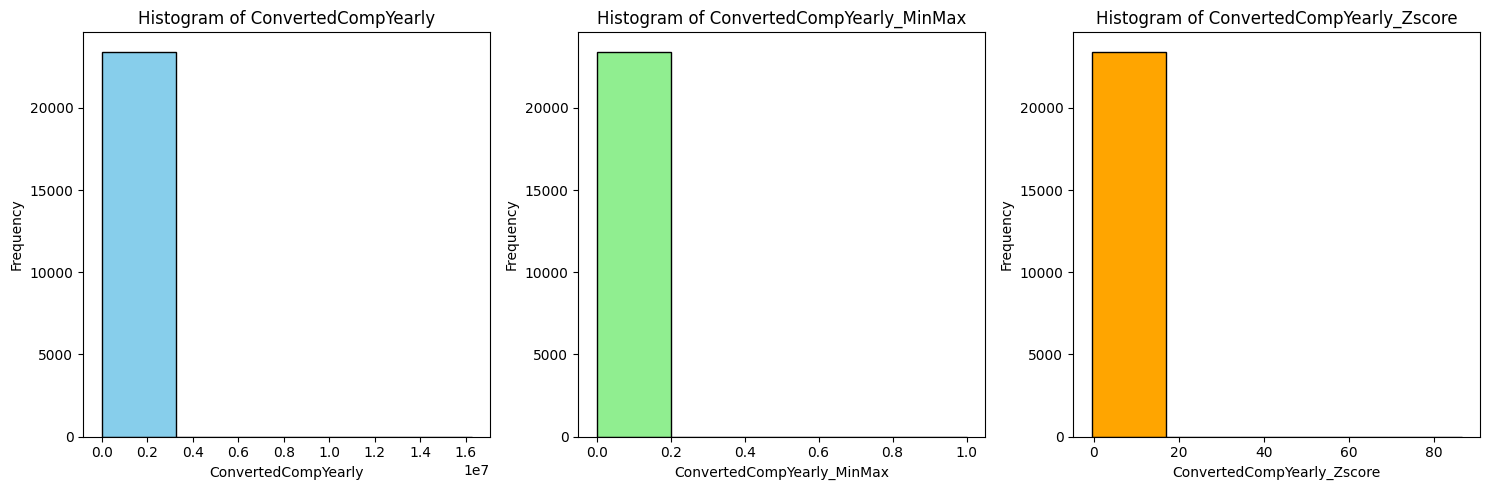

In [13]:
# Create a figure for the histograms
plt.figure(figsize=(15, 5))

# Plot histogram for the original 'ConvertedCompYearly'
plt.subplot(1, 3, 1)
plt.hist(df_cleaned['ConvertedCompYearly'], bins=5, color='skyblue', edgecolor='black')
plt.title('Histogram of ConvertedCompYearly')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequency')

# Plot histogram for 'ConvertedCompYearly_MinMax'
plt.subplot(1, 3, 2)
plt.hist(df_cleaned['ConvertedCompYearly_MinMax'], bins=5, color='lightgreen', edgecolor='black')
plt.title('Histogram of ConvertedCompYearly_MinMax')
plt.xlabel('ConvertedCompYearly_MinMax')
plt.ylabel('Frequency')

# Plot histogram for 'ConvertedCompYearly_Zscore'
plt.subplot(1,3,3)
plt.hist(df_cleaned['ConvertedCompYearly_Zscore'], bins=5, color='orange', edgecolor='black')
plt.title("Histogram of ConvertedCompYearly_Zscore")
plt.xlabel('ConvertedCompYearly_Zscore')
plt.ylabel('Frequency')

# Display the histograms
plt.tight_layout()
plt.show()

### Step 7: Summary and Next Steps


**In this lab, you focused on identifying and removing duplicate rows.**

- You handled missing values by imputing the most frequent value in a chosen column.

- You used ConvertedCompYearly for compensation normalization and handled missing values.

- For further analysis, consider exploring other columns or visualizing the cleaned dataset.


<!--
## Change Log

|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|

--!>


## <h3 align="center"> © IBM Corporation. All rights reserved. <h3/>
